# Model implementation for the fraud detection task

In [90]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

In [91]:
from sklearn.linear_model import LogisticRegressionCV   

In [92]:
X = df.drop(columns="Class")
y = df["Class"]

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,  random_state= 42, shuffle = True)

In [97]:
clf = LogisticRegressionCV(cv=6, random_state=42).fit(X_train, y_train)

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [116]:
import xgboost as xgb

In [158]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,       # number of trees
    learning_rate=0.05,      # step size shrinkage
    max_depth=7,            # maximum depth of a tree
    random_state=42,
    use_label_encoder=False,
    subsample = 0.8, 
    eval_metric='logloss'   # avoid warning about eval_metric
)


In [159]:
# Train the model
model.fit(X_train, y_train)

c:\Users\Utente\Documents\Università\MLOps\MLOps\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [160]:
# Make predictions
y_pred = model.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [162]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))

Accuracy: 0.9996839998595555
Precision: 0.9658119658119658
Recall: 0.8308823529411765
F1 Score: 0.8932806324110671


In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.98      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443



In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


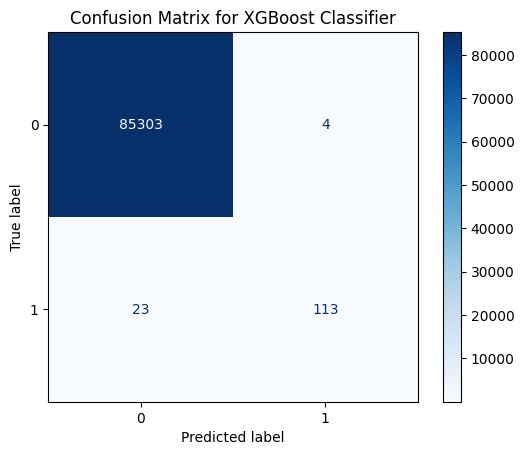

In [165]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

In [126]:
import lightgbm as lgb

In [152]:
# Initialize the LightGBM classifier
model = lgb.LGBMClassifier(
    n_estimators=140,
    learning_rate=0.05,
    max_depth=4,         
    random_state=42
)

In [153]:
# Train the model
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 356, number of negative: 199008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001786 -> initscore=-6.326170
[LightGBM] [Info] Start training from score -6.326170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(learning_rate=0.05, max_depth=4, n_estimators=140,
               random_state=42)

In [154]:

# Make predictions
y_pred = model.predict(X_test)

c:\Users\Utente\Documents\Università\MLOps\MLOps\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [155]:
# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))

Accuracy: 0.9989583699074237
Precision: 0.6407185628742516
Recall: 0.7867647058823529
F1 Score: 0.7062706270627063


In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.79      0.71       136

    accuracy                           1.00     85443
   macro avg       0.82      0.89      0.85     85443
weighted avg       1.00      1.00      1.00     85443



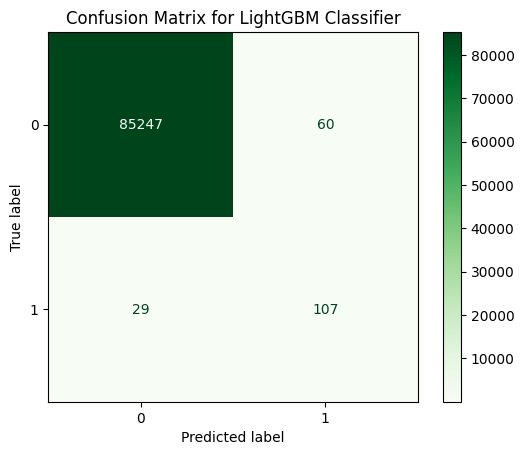

In [157]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix for LightGBM Classifier")
plt.show()